## Project Stage - IV (Basic Machine Learning)  ddl: 04/28/2023

## Goals

The goal of Stage IV is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.


### Tasks for Stage IV:

#### Task 1: (70 pts)
- Team: (30)
    - Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US. 
        - Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.
        - Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.
        - Plot trend line along for the data along with the forecast of 1 week ahead. 
        - Describe the trends as compared to other countries. 
- Member: (40 pts)
    - Utilize Linear and Non-Linear (polynomial) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from the first day of infections. 
        - X-Axis - number of days since the first case, Y - Axis number of new cases and deaths. Calcluate error using RMSE.
        - Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends.
        - Utilize the hospital data to calculate the point of no return for a state. Use percentage occupancy / utilization to see which states are close and what their trend looks like.
        - Perform hypothesis tests on questions identified in Stage II
            - e.x. *Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.*. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
        - Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing. 

    
#### Task 2: (30 pts)
- Member:
    - For each of the aforemention analysis plot graphs,
        - trend line
        - confidence intervals (error in prediction)
        - prediction path (forecast)

**Deliverable**
- Each member creates separate notebooks for member tasks. Upload all notebooks and reports to Canvas. Do not submit to Github, at least before the submission deadline, to avoid potential plagiarism.

In [67]:
# Sean Jung individaul work

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn import preprocessing

In [68]:
data = pd.read_csv('cases_deaths_county_data.csv')
FL_data = data[data.State == "FL"]
FL_data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2020-01-22,cases","2020-01-23,cases","2020-01-24,cases","2020-01-25,cases","2020-01-26,cases",...,"2023-01-08,deaths","2023-01-09,deaths","2023-01-10,deaths","2023-01-11,deaths","2023-01-12,deaths","2023-01-13,deaths","2023-01-14,deaths","2023-01-15,deaths","2023-01-16,deaths",population
328,328,0,Statewide Unallocated,FL,12,0,0,0,0,0,...,46633,47203,47203,47203,47203,47203,47203,47203,47203,0
329,329,12001,Alachua County,FL,12,0,0,0,0,0,...,285,285,285,285,285,285,285,285,285,269043
330,330,12003,Baker County,FL,12,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,29210
331,331,12005,Bay County,FL,12,0,0,0,0,0,...,394,394,394,394,394,394,394,394,394,174705
332,332,12007,Bradford County,FL,12,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,28201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,12125,Union County,FL,12,0,0,0,0,0,...,74,74,74,74,74,74,74,74,74,15237
392,392,12127,Volusia County,FL,12,0,0,0,0,0,...,846,846,846,846,846,846,846,846,846,553284
393,393,12129,Wakulla County,FL,12,0,0,0,0,0,...,56,56,56,56,56,56,56,56,56,33739
394,394,12131,Walton County,FL,12,0,0,0,0,0,...,89,89,89,89,89,89,89,89,89,74071


In [69]:
FL_daily_cases_deaths = FL_data.drop(FL_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
cases_indexes = []
deaths_indexes = []
for i in range(len(FL_daily_cases_deaths.keys())):
    if FL_daily_cases_deaths.keys()[i][-5:] == 'cases':
        cases_indexes.append(i)
    else:
        deaths_indexes.append(i)

FL_cases = FL_daily_cases_deaths.drop(FL_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
FL_deaths = FL_daily_cases_deaths.drop(FL_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

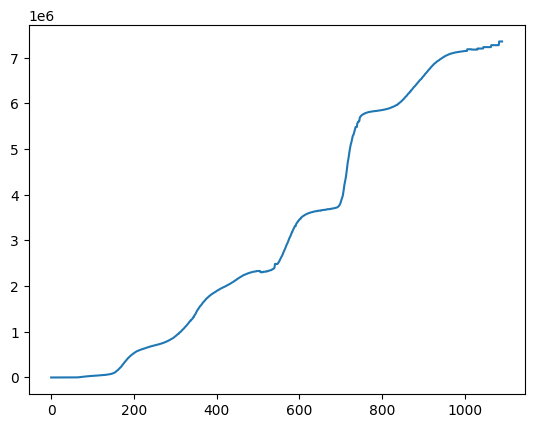

In [70]:
plt.plot(FL_cases)
plt.show()

In [71]:
len(FL_cases)

1091

In [72]:
#get 5 counties with highest number of cases by the end of the dataset
top_5_counties_index = []
FL_check = FL_data

for i in range(5):
    index = FL_check['2023-01-16,cases'].idxmax()
    top_5_counties_index.append(index)
    FL_check = FL_check.drop(index)
top_5_counties_index

[371, 334, 356, 378, 376]

In [73]:
#get names of counties based on indexes
top_5_countie_names = []
for i in top_5_counties_index:
    top_5_countie_names.append(FL_data.loc[i, 'County Name'])

top_5_countie_names

['Miami-Dade County ',
 'Broward County ',
 'Hillsborough County ',
 'Palm Beach County ',
 'Orange County ']

In [74]:
FL_data = FL_data.drop(FL_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)

In [81]:
cases_indexes = []
deaths_indexes = []
for i in range(len(FL_data.keys())):
    if FL_data.keys()[i][-5:] == 'cases':
        cases_indexes.append(i)
    else:
        deaths_indexes.append(i)

FL_cases = FL_data.drop(FL_data.columns[deaths_indexes], axis=1)
FL_deaths = FL_data.drop(FL_data.columns[cases_indexes], axis=1)

In [82]:
FL_cases

,"2020-01-22,cases","2020-01-23,cases","2020-01-24,cases","2020-01-25,cases","2020-01-26,cases","2020-01-27,cases","2020-01-28,cases","2020-01-29,cases","2020-01-30,cases","2020-01-31,cases",...,"2023-01-07,cases","2023-01-08,cases","2023-01-09,cases","2023-01-10,cases","2023-01-11,cases","2023-01-12,cases","2023-01-13,cases","2023-01-14,cases","2023-01-15,cases","2023-01-16,cases"
328,0,0,0,0,0,0,0,0,0,0,...,3017,3017,3017,3017,3017,3017,3017,3017,3017,3017
329,0,0,0,0,0,0,0,0,0,0,...,85571,85571,86397,86397,86397,86397,86397,86397,86397,86397
330,0,0,0,0,0,0,0,0,0,0,...,10410,10410,10493,10493,10493,10493,10493,10493,10493,10493
331,0,0,0,0,0,0,0,0,0,0,...,53685,53685,54206,54206,54206,54206,54206,54206,54206,54206
332,0,0,0,0,0,0,0,0,0,0,...,8859,8859,8976,8976,8976,8976,8976,8976,8976,8976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0,0,0,0,0,0,0,0,0,0,...,4966,4966,5006,5006,5006,5006,5006,5006,5006,5006
392,0,0,0,0,0,0,0,0,0,0,...,145206,145206,146760,146760,146760,146760,146760,146760,146760,146760
393,0,0,0,0,0,0,0,0,0,0,...,11746,11746,11886,11886,11886,11886,11886,11886,11886,11886
394,0,0,0,0,0,0,0,0,0,0,...,19077,19077,19266,19266,19266,19266,19266,19266,19266,19266


In [83]:
def convert_data_to_new_data(data):
    new_data = []
    for i in reversed(range(1, len(data))):
        diff = data[i] - data[i - 1]
        new_data.append(diff)
    return new_data

FL_state_cases = FL_cases.sum().values
MiamiDabe_cases = FL_cases.loc[371].values
Broward_cases = FL_cases.loc[334].values
Palm_Beach_cases = FL_cases.loc[378].values
Hillsborough_cases = FL_cases.loc[356].values
Orange_cases = FL_cases.loc[376].values

FL_state_deaths = FL_deaths.sum().values
MiamiDabe_deaths = FL_deaths.loc[371].values
Broward_deaths = FL_deaths.loc[334].values
Palm_Beach_deaths = FL_deaths.loc[378].values
Hillsborough_deaths = FL_deaths.loc[356].values
Orange_deaths = FL_deaths.loc[376].values

FL_state_new_cases = convert_data_to_new_data(FL_state_cases)
MiamiDabe_new_cases = convert_data_to_new_data(MiamiDabe_cases)
Broward_new_cases = convert_data_to_new_data(Broward_cases)
Palm_Beach_new_cases = convert_data_to_new_data(Palm_Beach_cases)
Hillsborough_new_cases = convert_data_to_new_data(Hillsborough_cases)
Orange_new_cases = convert_data_to_new_data(Orange_cases)

FL_state_new_deaths = convert_data_to_new_data(FL_state_deaths)
MiamiDabe_new_deaths = convert_data_to_new_data(MiamiDabe_deaths)
Broward_new_deaths = convert_data_to_new_data(Broward_deaths)
Palm_Beach_new_deaths = convert_data_to_new_data(Palm_Beach_deaths)
Hillsborough_new_deaths = convert_data_to_new_data(Hillsborough_deaths)
Orange_new_deaths = convert_data_to_new_data(Orange_deaths)

In [84]:
x_values = []
for i in range(1090):
    x_values.append(i)
x_values = np.array(x_values)
x_values = x_values.reshape((-1, 1))

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

nonlin_1 = PolynomialFeatures(degree=1, include_bias=False).fit_transform(x_values)
nonlin_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_values)
nonlin_5 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x_values)

In [86]:
FL_state_cases_model_1 = LinearRegression().fit(nonlin_1, FL_state_new_cases)
MiamiDabe_cases_model_1 = LinearRegression().fit(nonlin_1, MiamiDabe_new_cases)
Broward_cases_model_1 = LinearRegression().fit(nonlin_1, Broward_new_cases)
Palm_Beach_cases_model_1 = LinearRegression().fit(nonlin_1, Palm_Beach_new_cases)
Hillsborough_cases_model_1 = LinearRegression().fit(nonlin_1, Hillsborough_new_cases)
Orange_cases_model_1 = LinearRegression().fit(nonlin_1, Orange_new_cases)

FL_state_cases_model_2 = LinearRegression().fit(nonlin_2, FL_state_new_cases)
MiamiDabe_cases_model_2 = LinearRegression().fit(nonlin_2, MiamiDabe_new_cases)
Broward_cases_model_2 = LinearRegression().fit(nonlin_2, Broward_new_cases)
Palm_Beach_cases_model_2 = LinearRegression().fit(nonlin_2, Palm_Beach_new_cases)
Hillsborough_cases_model_2 = LinearRegression().fit(nonlin_2, Hillsborough_new_cases)
Orange_cases_model_2 = LinearRegression().fit(nonlin_2, Orange_new_cases)

FL_state_cases_model_5 = LinearRegression().fit(nonlin_5, FL_state_new_cases)
MiamiDabe_cases_model_5 = LinearRegression().fit(nonlin_5, MiamiDabe_new_cases)
Broward_cases_model_5 = LinearRegression().fit(nonlin_5, Broward_new_cases)
Palm_Beach_cases_model_5 = LinearRegression().fit(nonlin_5, Palm_Beach_new_cases)
Hillsborough_cases_model_5 = LinearRegression().fit(nonlin_5, Hillsborough_new_cases)
Orange_cases_model_5 = LinearRegression().fit(nonlin_5, Orange_new_cases)


FL_state_deaths_model_1 = LinearRegression().fit(nonlin_1, FL_state_new_deaths)
MiamiDabe_deaths_model_1 = LinearRegression().fit(nonlin_1, MiamiDabe_new_deaths)
Broward_deaths_model_1 = LinearRegression().fit(nonlin_1, Broward_new_deaths)
Palm_Beach_deaths_model_1 = LinearRegression().fit(nonlin_1, Palm_Beach_new_deaths)
Hillsborough_deaths_model_1 = LinearRegression().fit(nonlin_1, Hillsborough_new_deaths)
Orange_deaths_model_1 = LinearRegression().fit(nonlin_1, Orange_new_deaths)

FL_state_deaths_model_2 = LinearRegression().fit(nonlin_2, FL_state_new_deaths)
MiamiDabe_deaths_model_2 = LinearRegression().fit(nonlin_2, MiamiDabe_new_deaths)
Broward_deaths_model_2 = LinearRegression().fit(nonlin_2, Broward_new_deaths)
Palm_Beach_deaths_model_2 = LinearRegression().fit(nonlin_2, Palm_Beach_new_deaths)
Hillsborough_deaths_model_2 = LinearRegression().fit(nonlin_2, Hillsborough_new_deaths)
Orange_deaths_model_2 = LinearRegression().fit(nonlin_2, Orange_new_deaths)

FL_state_deaths_model_5 = LinearRegression().fit(nonlin_5, FL_state_new_deaths)
MiamiDabe_deaths_model_5 = LinearRegression().fit(nonlin_5, MiamiDabe_new_deaths)
Broward_deaths_model_5 = LinearRegression().fit(nonlin_5, Broward_new_deaths)
Palm_Beach_deaths_model_5 = LinearRegression().fit(nonlin_5, Palm_Beach_new_deaths)
Hillsborough_deaths_model_5 = LinearRegression().fit(nonlin_5, Hillsborough_new_deaths)
Orange_deaths_model_5 = LinearRegression().fit(nonlin_5, Orange_new_deaths)

In [87]:

FL_state_cases_y_pred_1 = FL_state_cases_model_1.predict(nonlin_1)
FL_state_cases_y_pred_2 = FL_state_cases_model_2.predict(nonlin_2)
FL_state_cases_y_pred_5 = FL_state_cases_model_5.predict(nonlin_5)
FL_state_deaths_y_pred_1 = FL_state_deaths_model_1.predict(nonlin_1)
FL_state_deaths_y_pred_2 = FL_state_deaths_model_2.predict(nonlin_2)
FL_state_deaths_y_pred_5 = FL_state_deaths_model_5.predict(nonlin_5)

MiamiDabe_cases_y_pred_1 = MiamiDabe_cases_model_1.predict(nonlin_1)
MiamiDabe_cases_y_pred_2 = MiamiDabe_cases_model_2.predict(nonlin_2)
MiamiDabe_cases_y_pred_5 = MiamiDabe_cases_model_5.predict(nonlin_5)
MiamiDabe_deaths_y_pred_1 = MiamiDabe_deaths_model_1.predict(nonlin_1)
MiamiDabe_deaths_y_pred_2 = MiamiDabe_deaths_model_2.predict(nonlin_2)
MiamiDabe_deaths_y_pred_5 = MiamiDabe_deaths_model_5.predict(nonlin_5)

Broward_cases_y_pred_1 = Broward_cases_model_1.predict(nonlin_1)
Broward_cases_y_pred_2 = Broward_cases_model_2.predict(nonlin_2)
Broward_cases_y_pred_5 = Broward_cases_model_5.predict(nonlin_5)
Broward_deaths_y_pred_1 = Broward_deaths_model_1.predict(nonlin_1)
Broward_deaths_y_pred_2 = Broward_deaths_model_2.predict(nonlin_2)
Broward_deaths_y_pred_5 = Broward_deaths_model_5.predict(nonlin_5)

Palm_Beach_cases_y_pred_1 = Palm_Beach_cases_model_1.predict(nonlin_1)
Palm_Beach_cases_y_pred_2 = Palm_Beach_cases_model_2.predict(nonlin_2)
Palm_Beach_cases_y_pred_5 = Palm_Beach_cases_model_5.predict(nonlin_5)
Palm_Beach_deaths_y_pred_1 = Palm_Beach_deaths_model_1.predict(nonlin_1)
Palm_Beach_deaths_y_pred_2 = Palm_Beach_deaths_model_2.predict(nonlin_2)
Palm_Beach_deaths_y_pred_5 = Palm_Beach_deaths_model_5.predict(nonlin_5)

Hillsborough_cases_y_pred_1 = Hillsborough_cases_model_1.predict(nonlin_1)
Hillsborough_cases_y_pred_2 = Hillsborough_cases_model_2.predict(nonlin_2)
Hillsborough_cases_y_pred_5 = Hillsborough_cases_model_5.predict(nonlin_5)
Hillsborough_deaths_y_pred_1 = Hillsborough_deaths_model_1.predict(nonlin_1)
Hillsborough_deaths_y_pred_2 = Hillsborough_deaths_model_2.predict(nonlin_2)
Hillsborough_deaths_y_pred_5 = Hillsborough_deaths_model_5.predict(nonlin_5)

Orange_cases_y_pred_1 = Orange_cases_model_1.predict(nonlin_1)
Orange_cases_y_pred_2 = Orange_cases_model_2.predict(nonlin_2)
Orange_cases_y_pred_5 = Orange_cases_model_5.predict(nonlin_5)
Orange_deaths_y_pred_1 = Orange_deaths_model_1.predict(nonlin_1)
Orange_deaths_y_pred_2 = Orange_deaths_model_2.predict(nonlin_2)
Orange_deaths_y_pred_5 = Orange_deaths_model_5.predict(nonlin_5)


In [88]:
x_test = np.linspace(0, 1090, 1090)[:, None]

In [89]:
FL_state_new_cases_df = pd.DataFrame(FL_state_new_cases, columns=['Cases'])
FL_state_new_cases_df['Day'] = FL_state_new_cases_df.index
MiamiDabe_new_cases_df = pd.DataFrame(MiamiDabe_new_cases, columns=['Cases'])
MiamiDabe_new_cases_df['Day'] = MiamiDabe_new_cases_df.index
Broward_new_cases_df = pd.DataFrame(Broward_new_cases, columns=['Cases'])
Broward_new_cases_df['Day'] = Broward_new_cases_df.index
Palm_Beach_new_cases_df = pd.DataFrame(Palm_Beach_new_cases, columns=['Cases'])
Palm_Beach_new_cases_df['Day'] = Palm_Beach_new_cases_df.index
Hillsborough_new_cases_df = pd.DataFrame(Hillsborough_new_cases, columns=['Cases'])
Hillsborough_new_cases_df['Day'] = Hillsborough_new_cases_df.index
Orange_new_cases_df = pd.DataFrame(Orange_new_cases, columns=['Cases'])
Orange_new_cases_df['Day'] = Orange_new_cases_df.index

FL_state_new_deaths_df = pd.DataFrame(FL_state_new_deaths, columns=['Deaths'])
FL_state_new_deaths_df['Day'] = FL_state_new_deaths_df.index
MiamiDabe_new_deaths_df = pd.DataFrame(MiamiDabe_new_deaths, columns=['Deaths'])
MiamiDabe_new_deaths_df['Day'] = MiamiDabe_new_deaths_df.index
Broward_new_deaths_df = pd.DataFrame(Broward_new_deaths, columns=['Deaths'])
Broward_new_deaths_df['Day'] = Broward_new_deaths_df.index
Palm_Beach_new_deaths_df = pd.DataFrame(Palm_Beach_new_deaths, columns=['Deaths'])
Palm_Beach_new_deaths_df['Day'] = Palm_Beach_new_deaths_df.index
Hillsborough_new_deaths_df = pd.DataFrame(Hillsborough_new_deaths, columns=['Deaths'])
Hillsborough_new_deaths_df['Day'] = Hillsborough_new_deaths_df.index
Orange_new_deaths_df = pd.DataFrame(Orange_new_deaths, columns=['Deaths'])
Orange_new_deaths_df['Day'] = Orange_new_deaths_df.index


In [90]:
import statsmodels.formula.api as smf

FL_state_cases_lm = smf.ols(formula='Cases ~ Day', data=FL_state_new_cases_df).fit()
FL_state_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=FL_state_new_cases_df).fit()
FL_state_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=FL_state_new_cases_df).fit()
MiamiDabe_cases_lm = smf.ols(formula='Cases ~ Day', data=MiamiDabe_new_cases_df).fit()
MiamiDabe_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=MiamiDabe_new_cases_df).fit()
MiamiDabe_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=MiamiDabe_new_cases_df).fit()
Broward_cases_lm = smf.ols(formula='Cases ~ Day', data=Broward_new_cases_df).fit()
Broward_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=Broward_new_cases_df).fit()
Broward_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=Broward_new_cases_df).fit()
Palm_Beach_cases_lm = smf.ols(formula='Cases ~ Day', data=Palm_Beach_new_cases_df).fit()
Palm_Beach_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=Palm_Beach_new_cases_df).fit()
Palm_Beach_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=Palm_Beach_new_cases_df).fit()
Hillsborough_cases_lm = smf.ols(formula='Cases ~ Day', data=Hillsborough_new_cases_df).fit()
Hillsborough_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=Hillsborough_new_cases_df).fit()
Hillsborough_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=Hillsborough_new_cases_df).fit()
Orange_cases_lm = smf.ols(formula='Cases ~ Day', data=Orange_new_cases_df).fit()
Orange_cases_lm_poly_2 = smf.ols(formula='Cases ~ Day +I(Day ** 2.0)', data=Orange_new_cases_df).fit()
Orange_cases_lm_poly_3 = smf.ols(formula='Cases ~ Day +I(Day ** 3.0)', data=Orange_new_cases_df).fit()

FL_state_deaths_lm = smf.ols(formula='Deaths ~ Day', data=FL_state_new_deaths_df).fit()
FL_state_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=FL_state_new_deaths_df).fit()
FL_state_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=FL_state_new_deaths_df).fit()
MiamiDabe_deaths_lm = smf.ols(formula='Deaths ~ Day', data=MiamiDabe_new_deaths_df).fit()
MiamiDabe_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=MiamiDabe_new_deaths_df).fit()
MiamiDabe_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=MiamiDabe_new_deaths_df).fit()
Broward_deaths_lm = smf.ols(formula='Deaths ~ Day', data=Broward_new_deaths_df).fit()
Broward_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=Broward_new_deaths_df).fit()
Broward_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=Broward_new_deaths_df).fit()
Palm_Beach_deaths_lm = smf.ols(formula='Deaths ~ Day', data=Palm_Beach_new_deaths_df).fit()
Palm_Beach_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=Palm_Beach_new_deaths_df).fit()
Palm_Beach_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=Palm_Beach_new_deaths_df).fit()
Hillsborough_deaths_lm = smf.ols(formula='Deaths ~ Day', data=Hillsborough_new_deaths_df).fit()
Hillsborough_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=Hillsborough_new_deaths_df).fit()
Hillsborough_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=Hillsborough_new_deaths_df).fit()
Orange_deaths_lm = smf.ols(formula='Deaths ~ Day', data=Orange_new_deaths_df).fit()
Orange_deaths_lm_poly_2 = smf.ols(formula='Deaths ~ Day +I(Day ** 2.0)', data=Orange_new_deaths_df).fit()
Orange_deaths_lm_poly_3 = smf.ols(formula='Deaths ~ Day +I(Day ** 3.0)', data=Orange_new_deaths_df).fit()


In [91]:
X_new = pd.DataFrame({'Day': [MiamiDabe_new_cases_df.Day.min(), MiamiDabe_new_cases_df.Day.max()]})

In [92]:
x_values = []
for i in range(1090):
    x_values.append(i)
x_values = np.array(x_values)

In [93]:
FL_state_new_cases_conf_int = FL_state_cases_lm.get_prediction(FL_state_new_cases_df).summary_frame(alpha=0.05)
MiamiDabe_new_cases_conf_int = MiamiDabe_cases_lm.get_prediction(MiamiDabe_new_cases_df).summary_frame(alpha=0.05)
Broward_new_cases_conf_int = Broward_cases_lm.get_prediction(Broward_new_cases_df).summary_frame(alpha=0.05)
Palm_Beach_new_cases_conf_int = Palm_Beach_cases_lm.get_prediction(Palm_Beach_new_cases_df).summary_frame(alpha=0.05)
Hillsborough_new_cases_conf_int = Hillsborough_cases_lm.get_prediction(Hillsborough_new_cases_df).summary_frame(alpha=0.05)
Orange_new_cases_conf_int = Orange_cases_lm.get_prediction(Orange_new_cases_df).summary_frame(alpha=0.05)

FL_state_new_deaths_conf_int = FL_state_deaths_lm.get_prediction(FL_state_new_deaths_df).summary_frame(alpha=0.05)
MiamiDabe_new_deaths_conf_int = MiamiDabe_deaths_lm.get_prediction(MiamiDabe_new_deaths_df).summary_frame(alpha=0.05)
Broward_new_deaths_conf_int = Broward_deaths_lm.get_prediction(Broward_new_deaths_df).summary_frame(alpha=0.05)
Palm_Beach_new_deaths_conf_int = Palm_Beach_deaths_lm.get_prediction(Palm_Beach_new_deaths_df).summary_frame(alpha=0.05)
Hillsborough_new_deaths_conf_int = Hillsborough_deaths_lm.get_prediction(Hillsborough_new_deaths_df).summary_frame(alpha=0.05)
Orange_new_deaths_conf_int = Orange_deaths_lm.get_prediction(Orange_new_deaths_df).summary_frame(alpha=0.05)

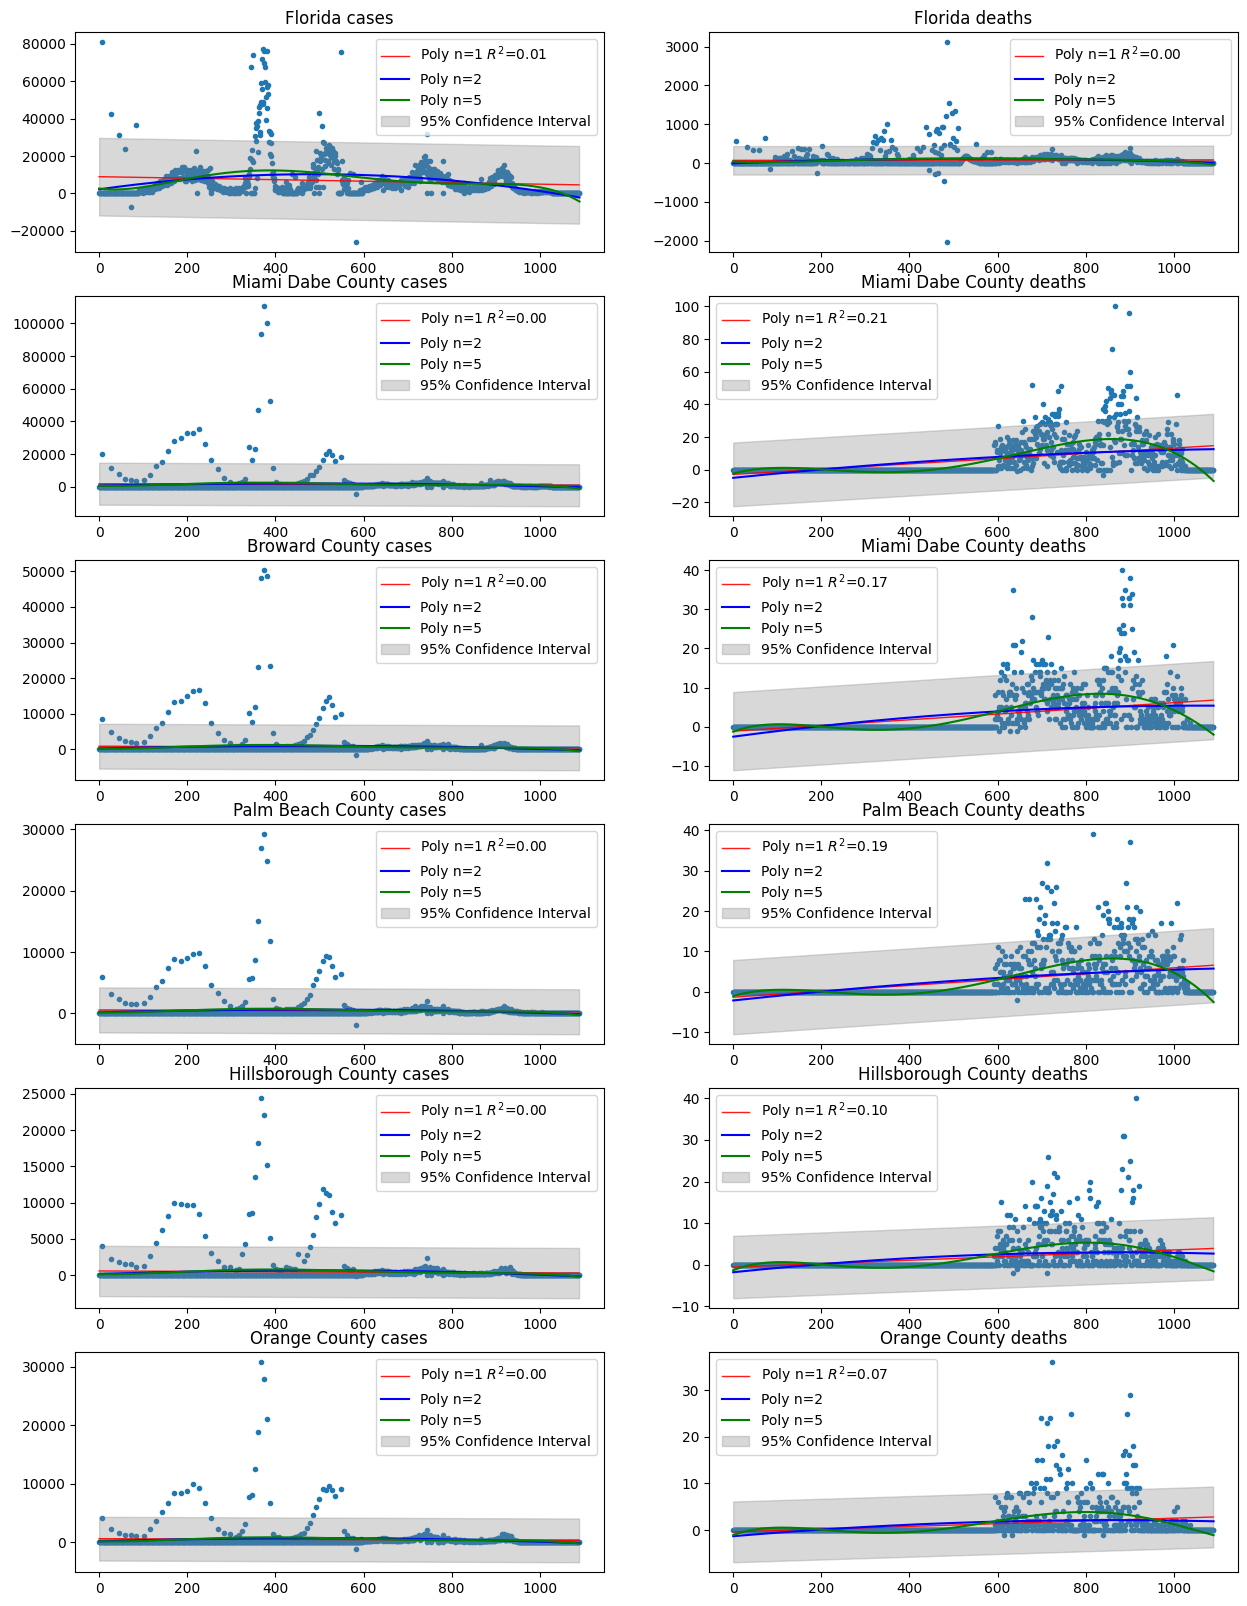

In [94]:
import seaborn as sns

figure, axis = plt.subplots(6, 2, figsize=(15, 20))

axis[0, 0].scatter(FL_state_new_cases_df.Day, FL_state_new_cases_df.Cases, marker='.')
axis[0, 0].plot(X_new, FL_state_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % FL_state_cases_lm.rsquared)
axis[0, 0].plot(x_test.ravel(), FL_state_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[0, 0].plot(x_test.ravel(), FL_state_cases_y_pred_5, c ="green", label='Poly n=5')
axis[0, 0].fill_between(x_values, FL_state_new_cases_conf_int['obs_ci_lower'], FL_state_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[0, 0].set_title('Florida cases')
axis[0, 0].legend()
axis[0, 1].scatter(FL_state_new_deaths_df.Day, FL_state_new_deaths_df.Deaths, marker='.')
axis[0, 1].plot(X_new, FL_state_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % FL_state_deaths_lm.rsquared)
axis[0, 1].plot(x_test.ravel(), FL_state_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[0, 1].plot(x_test.ravel(), FL_state_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[0, 1].fill_between(x_values, FL_state_new_deaths_conf_int['obs_ci_lower'], FL_state_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[0, 1].set_title('Florida deaths')
axis[0, 1].legend()

axis[1, 0].scatter(MiamiDabe_new_cases_df.Day, MiamiDabe_new_cases_df.Cases, marker='.')
axis[1, 0].plot(X_new, MiamiDabe_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % MiamiDabe_cases_lm.rsquared)
axis[1, 0].plot(x_test.ravel(), MiamiDabe_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[1, 0].plot(x_test.ravel(), MiamiDabe_cases_y_pred_5, c ="green", label='Poly n=5')
axis[1, 0].fill_between(x_values, MiamiDabe_new_cases_conf_int['obs_ci_lower'], MiamiDabe_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[1, 0].set_title('Miami Dabe County cases')
axis[1, 0].legend()
axis[1, 1].scatter(MiamiDabe_new_deaths_df.Day, MiamiDabe_new_deaths_df.Deaths, marker='.')
axis[1, 1].plot(X_new, MiamiDabe_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % MiamiDabe_deaths_lm.rsquared)
axis[1, 1].plot(x_test.ravel(), MiamiDabe_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[1, 1].plot(x_test.ravel(), MiamiDabe_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[1, 1].fill_between(x_values, MiamiDabe_new_deaths_conf_int['obs_ci_lower'], MiamiDabe_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[1, 1].set_title('Miami Dabe County deaths')
axis[1, 1].legend()

axis[2, 0].scatter(Broward_new_cases_df.Day, Broward_new_cases_df.Cases, marker='.')
axis[2, 0].plot(X_new, Broward_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Broward_cases_lm.rsquared)
axis[2, 0].plot(x_test.ravel(), Broward_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[2, 0].plot(x_test.ravel(), Broward_cases_y_pred_5, c ="green", label='Poly n=5')
axis[2, 0].fill_between(x_values, Broward_new_cases_conf_int['obs_ci_lower'], Broward_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[2, 0].set_title('Broward County cases')
axis[2, 0].legend()
axis[2, 1].scatter(Broward_new_deaths_df.Day, Broward_new_deaths_df.Deaths, marker='.')
axis[2, 1].plot(X_new, Broward_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Broward_deaths_lm.rsquared)
axis[2, 1].plot(x_test.ravel(), Broward_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[2, 1].plot(x_test.ravel(), Broward_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[2, 1].fill_between(x_values, Broward_new_deaths_conf_int['obs_ci_lower'], Broward_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[2, 1].set_title('Miami Dabe County deaths')
axis[2, 1].legend()

axis[3, 0].scatter(Palm_Beach_new_cases_df.Day, Palm_Beach_new_cases_df.Cases, marker='.')
axis[3, 0].plot(X_new, Palm_Beach_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Palm_Beach_cases_lm.rsquared)
axis[3, 0].plot(x_test.ravel(), Palm_Beach_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[3, 0].plot(x_test.ravel(), Palm_Beach_cases_y_pred_5, c ="green", label='Poly n=5')
axis[3, 0].fill_between(x_values, Palm_Beach_new_cases_conf_int['obs_ci_lower'], Palm_Beach_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[3, 0].set_title('Palm Beach County cases')
axis[3, 0].legend()
axis[3, 1].scatter(Palm_Beach_new_deaths_df.Day, Palm_Beach_new_deaths_df.Deaths, marker='.')
axis[3, 1].plot(X_new, Palm_Beach_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Palm_Beach_deaths_lm.rsquared)
axis[3, 1].plot(x_test.ravel(), Palm_Beach_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[3, 1].plot(x_test.ravel(), Palm_Beach_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[3, 1].fill_between(x_values, Palm_Beach_new_deaths_conf_int['obs_ci_lower'], Palm_Beach_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[3, 1].set_title('Palm Beach County deaths')
axis[3, 1].legend()

axis[4, 0].scatter(Hillsborough_new_cases_df.Day, Hillsborough_new_cases_df.Cases, marker='.')
axis[4, 0].plot(X_new, Hillsborough_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Broward_cases_lm.rsquared)
axis[4, 0].plot(x_test.ravel(), Hillsborough_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[4, 0].plot(x_test.ravel(), Hillsborough_cases_y_pred_5, c ="green", label='Poly n=5')
axis[4, 0].fill_between(x_values, Hillsborough_new_cases_conf_int['obs_ci_lower'], Hillsborough_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[4, 0].set_title('Hillsborough County cases')
axis[4, 0].legend()
axis[4, 1].scatter(Hillsborough_new_deaths_df.Day, Hillsborough_new_deaths_df.Deaths, marker='.')
axis[4, 1].plot(X_new, Hillsborough_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Hillsborough_deaths_lm.rsquared)
axis[4, 1].plot(x_test.ravel(), Hillsborough_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[4, 1].plot(x_test.ravel(), Hillsborough_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[4, 1].fill_between(x_values, Hillsborough_new_deaths_conf_int['obs_ci_lower'], Hillsborough_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[4, 1].set_title('Hillsborough County deaths')
axis[4, 1].legend()

axis[5, 0].scatter(Orange_new_cases_df.Day, Orange_new_cases_df.Cases, marker='.')
axis[5, 0].plot(X_new, Orange_cases_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Orange_cases_lm.rsquared)
axis[5, 0].plot(x_test.ravel(), Orange_cases_y_pred_2, c ="blue", label='Poly n=2')
axis[5, 0].plot(x_test.ravel(), Orange_cases_y_pred_5, c ="green", label='Poly n=5')
axis[5, 0].fill_between(x_values, Orange_new_cases_conf_int['obs_ci_lower'], Orange_new_cases_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[5, 0].set_title('Orange County cases')
axis[5, 0].legend()
axis[5, 1].scatter(Orange_new_deaths_df.Day, Orange_new_deaths_df.Deaths, marker='.')
axis[5, 1].plot(X_new, Orange_deaths_lm.predict(X_new), c='red', linewidth=1, alpha=0.9, label='Poly n=1 $R^2$=%.2f' % Orange_deaths_lm.rsquared)
axis[5, 1].plot(x_test.ravel(), Orange_deaths_y_pred_2, c ="blue", label='Poly n=2')
axis[5, 1].plot(x_test.ravel(), Orange_deaths_y_pred_5, c ="green", label='Poly n=5')
axis[5, 1].fill_between(x_values, Orange_new_deaths_conf_int['obs_ci_lower'], Orange_new_deaths_conf_int['obs_ci_upper'], color='gray', alpha=0.3, label='95% Confidence Interval')
axis[5, 1].set_title('Orange County deaths')
axis[5, 1].legend()

In [95]:
from sklearn.metrics import mean_squared_error
day_df = pd.DataFrame(MiamiDabe_new_cases, columns=['Cases'])
day_df['Day'] = day_df.index
day_df = day_df.drop('Cases', axis=1)

FL_state_new_cases_preds = FL_state_cases_lm.predict(day_df)
MiamiDabe_new_cases_preds = MiamiDabe_cases_lm.predict(day_df)
Broward_new_cases_preds = Broward_cases_lm.predict(day_df)
Palm_Beach_new_cases_preds = Palm_Beach_cases_lm.predict(day_df)
Hillsborough_new_cases_preds = Hillsborough_cases_lm.predict(day_df)
Orange_new_cases_preds = Orange_cases_lm.predict(day_df)

FL_state_new_deaths_preds = FL_state_deaths_lm.predict(day_df)
MiamiDabe_new_deaths_preds = MiamiDabe_deaths_lm.predict(day_df)
Broward_new_deaths_preds = Broward_deaths_lm.predict(day_df)
Palm_Beach_new_deaths_preds = Palm_Beach_deaths_lm.predict(day_df)
Hillsborough_new_deaths_preds = Hillsborough_deaths_lm.predict(day_df)
Orange_new_deaths_preds = Orange_deaths_lm.predict(day_df)


FL_state_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), FL_state_new_cases_preds))
MiamiDabe_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), MiamiDabe_new_cases_preds))
Broward_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), Broward_new_cases_preds))
Palm_Beach_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), Palm_Beach_new_cases_preds))
Hillsborough_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), Hillsborough_new_cases_preds))
Orange_new_cases_rmse = np.sqrt(mean_squared_error(np.arange(1090), Orange_new_cases_preds))

FL_state_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), FL_state_new_deaths_preds))
MiamiDabe_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), MiamiDabe_new_deaths_preds))
Broward_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), Broward_new_deaths_preds))
Palm_Beach_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), Palm_Beach_new_deaths_preds))
Hillsborough_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), Hillsborough_new_deaths_preds))
Orange_new_deaths_rmse = np.sqrt(mean_squared_error(np.arange(1090), Orange_new_deaths_preds))



In [96]:
print('RMSE values for linear regression lines:')
print('FL state cases = ' + str(FL_state_new_cases_rmse))
print('Miami Dabe cases = ' + str(MiamiDabe_new_cases_rmse))
print('Broward cases = ' + str(Broward_new_cases_rmse))
print('Palm Beach cases = ' + str(Palm_Beach_new_cases_rmse))
print('Hillsborough cases = ' + str(Hillsborough_new_cases_rmse))
print('Orange cases = ' + str(Orange_new_cases_rmse))

print('FL state deaths = ' + str(FL_state_new_deaths_rmse))
print('Miami Dabe deaths = ' + str(MiamiDabe_new_deaths_rmse))
print('Broward deaths = ' + str(Broward_new_deaths_rmse))
print('Palm Beach deaths = ' + str(Palm_Beach_new_deaths_rmse))
print('Hillsborough deaths = ' + str(Hillsborough_new_deaths_rmse))
print('Orange deaths = ' + str(Orange_new_deaths_rmse))

RMSE values for linear regression lines:
FL state cases = 6397.490974780182
Miami Dabe cases = 1024.7910233150242
Broward cases = 471.3913252694136
Palm Beach cases = 417.63844024170675
Hillsborough cases = 416.82687527056623
Orange cases = 416.75924320592003
FL state deaths = 561.3471068286025
Miami Dabe deaths = 621.2025950030412
Broward deaths = 625.2865339029603
Palm Beach deaths = 625.4476128990783
Hillsborough deaths = 626.7763586505511
Orange deaths = 627.3762727588323


In [97]:
FL_daily_cases_deaths = FL_data.drop(FL_data.columns[[0, 1, 2, 3, 4, -1]], axis=1)
cases_indexes = []
deaths_indexes = []
for i in range(len(FL_daily_cases_deaths.keys())):
    if FL_daily_cases_deaths.keys()[i][-5:] == 'cases':
        cases_indexes.append(i)
    else:
        deaths_indexes.append(i)

FL_cases = FL_daily_cases_deaths.drop(FL_daily_cases_deaths.columns[deaths_indexes],axis=1).sum().tolist()
FL_deaths = FL_daily_cases_deaths.drop(FL_daily_cases_deaths.columns[cases_indexes],axis=1).sum().tolist()

In [98]:
len(FL_cases)

1086

In [99]:
dataset_days = 1085
last_day_cases = FL_cases[dataset_days]
last_day_deaths = FL_deaths[dataset_days]
num_pred_days = 90
pred_days = list(range(dataset_days + 1, dataset_days + 1 + num_pred_days))
x_preds = np.array(pred_days).reshape(-1, 1)

In [104]:
x_nonlin_2 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(np.array(x_preds).reshape((-1, 1)))
x_nonlin_5 = PolynomialFeatures(degree=5, include_bias=False).fit_transform(np.array(x_preds).reshape((-1, 1)))
x_preds = pd.DataFrame(x_preds, columns=['Day'])
FL_state_cases_x_preds = FL_state_cases_lm.predict(x_preds).values
FL_state_cases_x_preds_2 = FL_state_cases_model_2.predict(x_nonlin_2)
FL_state_cases_x_preds_5 = FL_state_cases_model_5.predict(x_nonlin_5)
FL_state_deaths_x_preds = FL_state_deaths_lm.predict(x_preds).values
FL_state_deaths_x_preds_2 = FL_state_deaths_model_2.predict(x_nonlin_2)
FL_state_deaths_x_preds_5 = FL_state_deaths_model_5.predict(x_nonlin_5)

MiamiDabe_cases_x_preds = MiamiDabe_cases_lm.predict(x_preds).values
MiamiDabe_cases_x_preds_2 = MiamiDabe_cases_model_2.predict(x_nonlin_2)
MiamiDabe_cases_x_preds_5 = MiamiDabe_cases_model_5.predict(x_nonlin_5)
MiamiDabe_deaths_x_preds = MiamiDabe_deaths_lm.predict(x_preds).values
MiamiDabe_deaths_x_preds_2 = MiamiDabe_deaths_model_2.predict(x_nonlin_2)
MiamiDabe_deaths_x_preds_5 = MiamiDabe_deaths_model_5.predict(x_nonlin_5)

Broward_cases_x_preds = Broward_cases_lm.predict(x_preds).values
Broward_cases_x_preds_2 = Broward_cases_model_2.predict(x_nonlin_2)
Broward_cases_x_preds_5 = Broward_cases_model_5.predict(x_nonlin_5)
Broward_deaths_x_preds = Broward_deaths_lm.predict(x_preds).values
Broward_deaths_x_preds_2 = Broward_deaths_model_2.predict(x_nonlin_2)
Broward_deaths_x_preds_5 = Broward_deaths_model_5.predict(x_nonlin_5)

Palm_Beach_cases_x_preds = Palm_Beach_cases_lm.predict(x_preds).values
Palm_Beach_cases_x_preds_2 = Palm_Beach_cases_model_2.predict(x_nonlin_2)
Palm_Beach_cases_x_preds_5 = Palm_Beach_cases_model_5.predict(x_nonlin_5)
Palm_Beach_deaths_x_preds = Palm_Beach_deaths_lm.predict(x_preds).values
Palm_Beach_deaths_x_preds_2 = Palm_Beach_deaths_model_2.predict(x_nonlin_2)
Palm_Beach_deaths_x_preds_5 = Palm_Beach_deaths_model_5.predict(x_nonlin_5)

Hillsborough_cases_x_preds = Hillsborough_cases_lm.predict(x_preds).values
Hillsborough_cases_x_preds_2 = Hillsborough_cases_model_2.predict(x_nonlin_2)
Hillsborough_cases_x_preds_5 = Hillsborough_cases_model_5.predict(x_nonlin_5)
Hillsborough_deaths_x_preds = Hillsborough_deaths_lm.predict(x_preds).values
Hillsborough_deaths_x_preds_2 = Hillsborough_deaths_model_2.predict(x_nonlin_2)
Hillsborough_deaths_x_preds_5 = Hillsborough_deaths_model_5.predict(x_nonlin_5)

Orange_cases_x_preds = Orange_cases_lm.predict(x_preds).values
Orange_cases_x_preds_2 = Orange_cases_model_2.predict(x_nonlin_2)
Orange_cases_x_preds_5 = Orange_cases_model_5.predict(x_nonlin_5)
Orange_deaths_x_preds = Orange_deaths_lm.predict(x_preds).values
Orange_deaths_x_preds_2 = Orange_deaths_model_2.predict(x_nonlin_2)
Orange_deaths_x_preds_5 = Orange_deaths_model_5.predict(x_nonlin_5)

In [112]:
FL_cases_1_preds_total = [last_day_cases]
FL_cases_2_preds_total = [last_day_cases]
FL_cases_5_preds_total = [last_day_cases]
MiamiDabe_cases_1_preds_total = [last_day_cases]
MiamiDabe_cases_2_preds_total = [last_day_cases]
MiamiDabe_cases_5_preds_total = [last_day_cases]
Broward_cases_1_preds_total = [last_day_cases]
Broward_cases_2_preds_total = [last_day_cases]
Broward_cases_5_preds_total = [last_day_cases]
Palm_Beach_cases_1_preds_total = [last_day_cases]
Palm_Beach_cases_2_preds_total = [last_day_cases]
Palm_Beach_cases_5_preds_total = [last_day_cases]
Hillsborough_cases_1_preds_total = [last_day_cases]
Hillsborough_cases_2_preds_total = [last_day_cases]
Hillsborough_cases_5_preds_total = [last_day_cases]
Orange_cases_1_preds_total = [last_day_cases]
Orange_cases_2_preds_total = [last_day_cases]
Orange_cases_5_preds_total = [last_day_cases]

for i in range(len(FL_state_cases_x_preds)):
    FL_cases_1_preds_total.append(FL_cases_1_preds_total[i] + FL_state_cases_x_preds[i])
    FL_cases_2_preds_total.append(FL_cases_2_preds_total[i] + FL_state_cases_x_preds_2[i])
    FL_cases_5_preds_total.append(FL_cases_5_preds_total[i] + FL_state_cases_x_preds_5[i])
    MiamiDabe_cases_1_preds_total.append(MiamiDabe_cases_1_preds_total[i] + MiamiDabe_cases_x_preds[i])
    MiamiDabe_cases_2_preds_total.append(MiamiDabe_cases_2_preds_total[i] + MiamiDabe_cases_x_preds_2[i])
    MiamiDabe_cases_5_preds_total.append(MiamiDabe_cases_5_preds_total[i] + MiamiDabe_cases_x_preds_5[i])
    Broward_cases_1_preds_total.append(Broward_cases_1_preds_total[i] + Broward_cases_x_preds[i])
    Broward_cases_2_preds_total.append(Broward_cases_2_preds_total[i] + Broward_cases_x_preds_2[i])
    Broward_cases_5_preds_total.append(Broward_cases_5_preds_total[i] + Broward_cases_x_preds_5[i])
    Palm_Beach_cases_1_preds_total.append(Palm_Beach_cases_1_preds_total[i] + Palm_Beach_cases_x_preds[i])
    Palm_Beach_cases_2_preds_total.append(Palm_Beach_cases_2_preds_total[i] + Palm_Beach_cases_x_preds_2[i])
    Palm_Beach_cases_5_preds_total.append(Palm_Beach_cases_5_preds_total[i] + Palm_Beach_cases_x_preds_5[i])
    Hillsborough_cases_1_preds_total.append(Hillsborough_cases_1_preds_total[i] + Hillsborough_cases_x_preds[i])
    Hillsborough_cases_2_preds_total.append(Hillsborough_cases_2_preds_total[i] + Hillsborough_cases_x_preds_2[i])
    Hillsborough_cases_5_preds_total.append(Hillsborough_cases_5_preds_total[i] + Hillsborough_cases_x_preds_5[i])
    Orange_cases_1_preds_total.append(Orange_cases_1_preds_total[i] + Orange_cases_x_preds[i])
    Orange_cases_2_preds_total.append(Orange_cases_2_preds_total[i] + Orange_cases_x_preds_2[i])
    Orange_cases_5_preds_total.append(Orange_cases_5_preds_total[i] + Orange_cases_x_preds_5[i])

FL_cases_1_preds_total.pop()
FL_cases_2_preds_total.pop()
FL_cases_5_preds_total.pop()
MiamiDabe_cases_1_preds_total.pop()
MiamiDabe_cases_2_preds_total.pop()
MiamiDabe_cases_5_preds_total.pop()
Broward_cases_1_preds_total.pop()
Broward_cases_2_preds_total.pop()
Broward_cases_5_preds_total.pop()
Palm_Beach_cases_1_preds_total.pop()
Palm_Beach_cases_2_preds_total.pop()
Palm_Beach_cases_5_preds_total.pop()
Hillsborough_cases_1_preds_total.pop()
Hillsborough_cases_2_preds_total.pop()
Hillsborough_cases_5_preds_total.pop()
Orange_cases_1_preds_total.pop()
Orange_cases_2_preds_total.pop()
Orange_cases_5_preds_total.pop()

7284407.80651015

In [113]:
FL_deaths_1_preds_total = [last_day_deaths]
FL_deaths_2_preds_total = [last_day_deaths]
FL_deaths_5_preds_total = [last_day_deaths]
MiamiDabe_deaths_1_preds_total = [last_day_deaths]
MiamiDabe_deaths_2_preds_total = [last_day_deaths]
MiamiDabe_deaths_5_preds_total = [last_day_deaths]
Broward_deaths_1_preds_total = [last_day_deaths]
Broward_deaths_2_preds_total = [last_day_deaths]
Broward_deaths_5_preds_total = [last_day_deaths]
Palm_Beach_deaths_1_preds_total = [last_day_deaths]
Palm_Beach_deaths_2_preds_total = [last_day_deaths]
Palm_Beach_deaths_5_preds_total = [last_day_deaths]
Hillsborough_deaths_1_preds_total = [last_day_deaths]
Hillsborough_deaths_2_preds_total = [last_day_deaths]
Hillsborough_deaths_5_preds_total = [last_day_deaths]
Orange_deaths_1_preds_total = [last_day_deaths]
Orange_deaths_2_preds_total = [last_day_deaths]
Orange_deaths_5_preds_total = [last_day_deaths]

for i in range(len(FL_state_deaths_x_preds)):
    FL_deaths_1_preds_total.append(FL_deaths_1_preds_total[i] + FL_state_deaths_x_preds[i])
    FL_deaths_2_preds_total.append(FL_deaths_2_preds_total[i] + FL_state_deaths_x_preds_2[i])
    FL_deaths_5_preds_total.append(FL_deaths_5_preds_total[i] + FL_state_deaths_x_preds_5[i])
    MiamiDabe_deaths_1_preds_total.append(MiamiDabe_deaths_1_preds_total[i] + MiamiDabe_deaths_x_preds[i])
    MiamiDabe_deaths_2_preds_total.append(MiamiDabe_deaths_2_preds_total[i] + MiamiDabe_deaths_x_preds_2[i])
    MiamiDabe_deaths_5_preds_total.append(MiamiDabe_deaths_5_preds_total[i] + MiamiDabe_deaths_x_preds_5[i])
    Broward_deaths_1_preds_total.append(Broward_deaths_1_preds_total[i] + Broward_deaths_x_preds[i])
    Broward_deaths_2_preds_total.append(Broward_deaths_2_preds_total[i] + Broward_deaths_x_preds_2[i])
    Broward_deaths_5_preds_total.append(Broward_deaths_5_preds_total[i] + Broward_deaths_x_preds_5[i])
    Palm_Beach_deaths_1_preds_total.append(Palm_Beach_deaths_1_preds_total[i] + Palm_Beach_deaths_x_preds[i])
    Palm_Beach_deaths_2_preds_total.append(Palm_Beach_deaths_2_preds_total[i] + Palm_Beach_deaths_x_preds_2[i])
    Palm_Beach_deaths_5_preds_total.append(Palm_Beach_deaths_5_preds_total[i] + Palm_Beach_deaths_x_preds_5[i])
    Hillsborough_deaths_1_preds_total.append(Hillsborough_deaths_1_preds_total[i] + Hillsborough_deaths_x_preds[i])
    Hillsborough_deaths_2_preds_total.append(Hillsborough_deaths_2_preds_total[i] + Hillsborough_deaths_x_preds_2[i])
    Hillsborough_deaths_5_preds_total.append(Hillsborough_deaths_5_preds_total[i] + Hillsborough_deaths_x_preds_5[i])
    Orange_deaths_1_preds_total.append(Orange_deaths_1_preds_total[i] + Orange_deaths_x_preds[i])
    Orange_deaths_2_preds_total.append(Orange_deaths_2_preds_total[i] + Orange_deaths_x_preds_2[i])
    Orange_deaths_5_preds_total.append(Orange_deaths_5_preds_total[i] + Orange_deaths_x_preds_5[i])

FL_deaths_1_preds_total.pop()
FL_deaths_2_preds_total.pop()
FL_deaths_5_preds_total.pop()
MiamiDabe_deaths_1_preds_total.pop()
MiamiDabe_deaths_2_preds_total.pop()
MiamiDabe_deaths_5_preds_total.pop()
Broward_deaths_1_preds_total.pop()
Broward_deaths_2_preds_total.pop()
Broward_deaths_5_preds_total.pop()
Palm_Beach_deaths_1_preds_total.pop()
Palm_Beach_deaths_2_preds_total.pop()
Palm_Beach_deaths_5_preds_total.pop()
Hillsborough_deaths_1_preds_total.pop()
Hillsborough_deaths_2_preds_total.pop()
Hillsborough_deaths_5_preds_total.pop()
Orange_deaths_1_preds_total.pop()
Orange_deaths_2_preds_total.pop()
Orange_deaths_5_preds_total.pop()

83992.50933936336

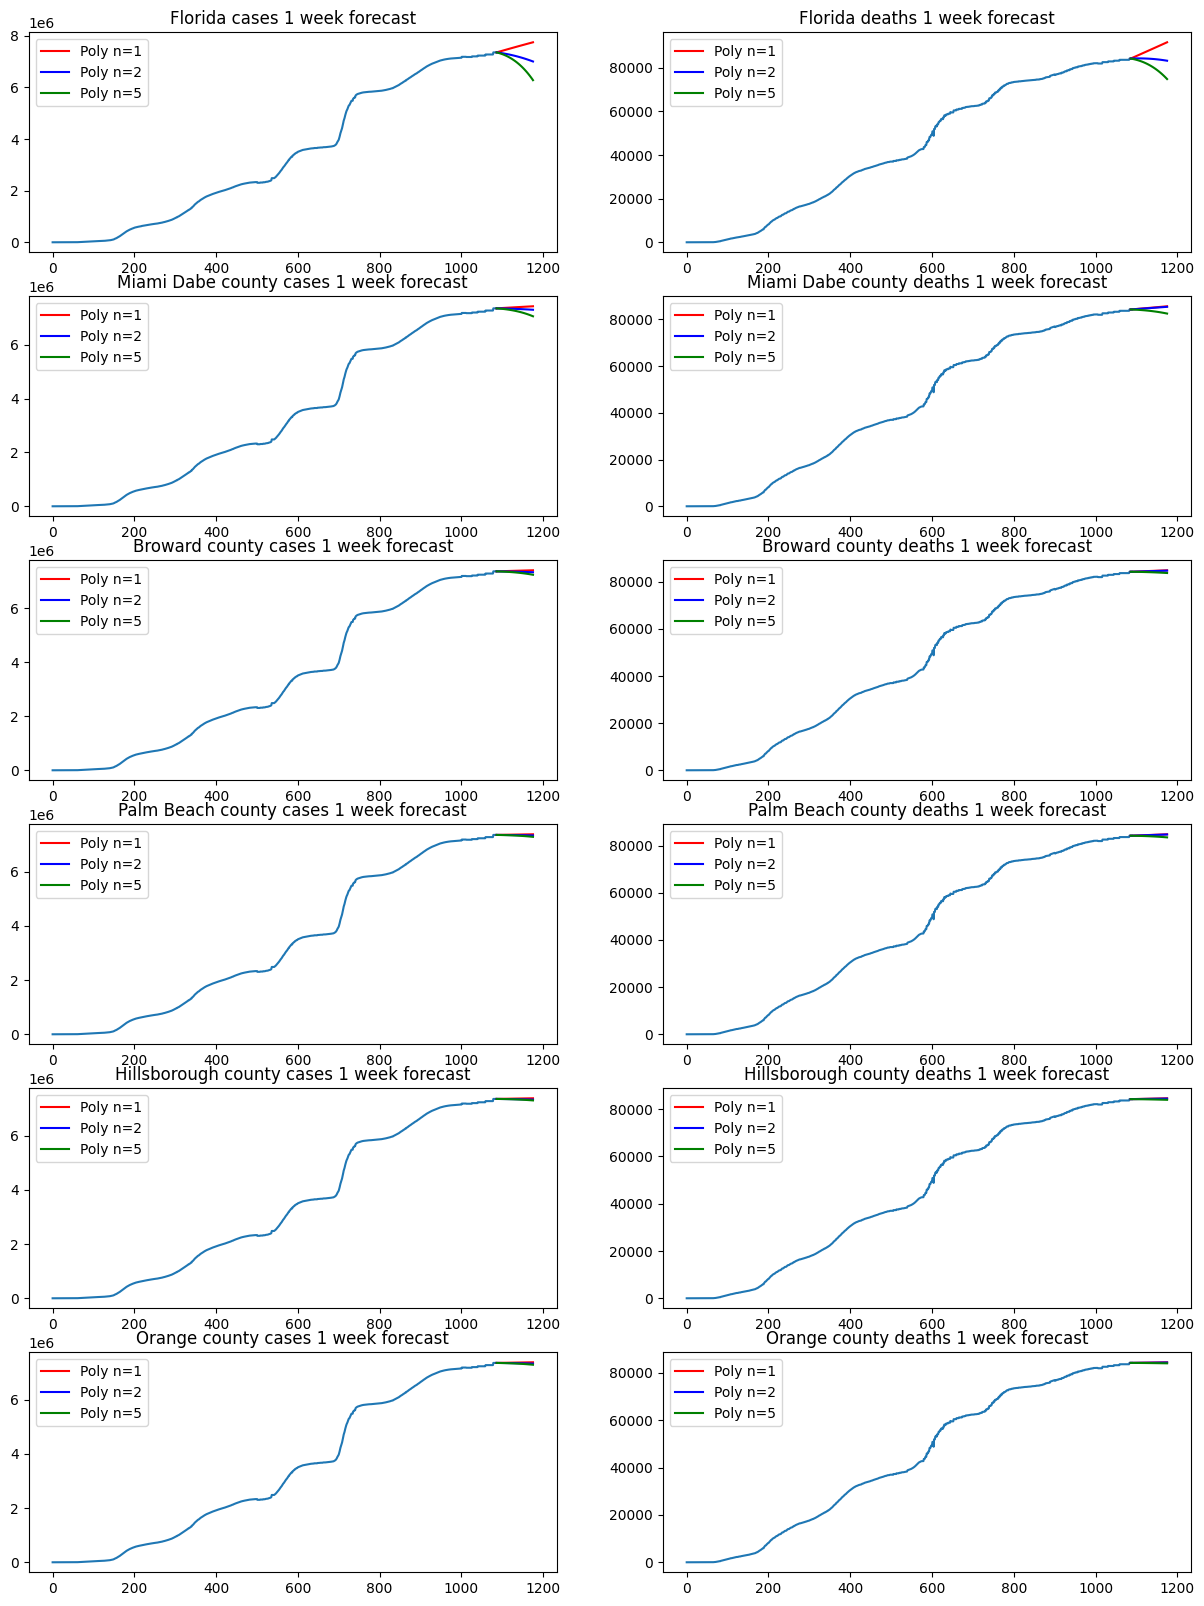

In [115]:
figure, axis = plt.subplots(6, 2, figsize=(15, 20))

axis[0, 0].plot(FL_cases)
axis[0, 0].plot(x_preds, FL_cases_1_preds_total, c ="red", label='Poly n=1')
axis[0, 0].plot(x_preds, FL_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[0, 0].plot(x_preds, FL_cases_5_preds_total, c ="green", label='Poly n=5')
axis[0, 0].set_title('Florida cases 1 week forecast')
axis[0, 0].legend()
axis[0, 1].plot(FL_deaths)
axis[0, 1].plot(x_preds, FL_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[0, 1].plot(x_preds, FL_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[0, 1].plot(x_preds, FL_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[0, 1].set_title('Florida deaths 1 week forecast')
axis[0, 1].legend()

axis[1, 0].plot(FL_cases)
axis[1, 0].plot(x_preds, MiamiDabe_cases_1_preds_total, c ="red", label='Poly n=1')
axis[1, 0].plot(x_preds, MiamiDabe_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[1, 0].plot(x_preds, MiamiDabe_cases_5_preds_total, c ="green", label='Poly n=5')
axis[1, 0].set_title('Miami Dabe county cases 1 week forecast')
axis[1, 0].legend()
axis[1, 1].plot(FL_deaths)
axis[1, 1].plot(x_preds, MiamiDabe_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[1, 1].plot(x_preds, MiamiDabe_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[1, 1].plot(x_preds, MiamiDabe_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[1, 1].set_title('Miami Dabe county deaths 1 week forecast')
axis[1, 1].legend()

axis[2, 0].plot(FL_cases)
axis[2, 0].plot(x_preds, Broward_cases_1_preds_total, c ="red", label='Poly n=1')
axis[2, 0].plot(x_preds, Broward_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[2, 0].plot(x_preds, Broward_cases_5_preds_total, c ="green", label='Poly n=5')
axis[2, 0].set_title('Broward county cases 1 week forecast')
axis[2, 0].legend()
axis[2, 1].plot(FL_deaths)
axis[2, 1].plot(x_preds, Broward_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[2, 1].plot(x_preds, Broward_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[2, 1].plot(x_preds, Broward_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[2, 1].set_title('Broward county deaths 1 week forecast')
axis[2, 1].legend()

axis[3, 0].plot(FL_cases)
axis[3, 0].plot(x_preds, Palm_Beach_cases_1_preds_total, c ="red", label='Poly n=1')
axis[3, 0].plot(x_preds, Palm_Beach_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[3, 0].plot(x_preds, Palm_Beach_cases_5_preds_total, c ="green", label='Poly n=5')
axis[3, 0].set_title('Palm Beach county cases 1 week forecast')
axis[3, 0].legend()
axis[3, 1].plot(FL_deaths)
axis[3, 1].plot(x_preds, Palm_Beach_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[3, 1].plot(x_preds, Palm_Beach_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[3, 1].plot(x_preds, Palm_Beach_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[3, 1].set_title('Palm Beach county deaths 1 week forecast')
axis[3, 1].legend()

axis[4, 0].plot(FL_cases)
axis[4, 0].plot(x_preds, Hillsborough_cases_1_preds_total, c ="red", label='Poly n=1')
axis[4, 0].plot(x_preds, Hillsborough_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[4, 0].plot(x_preds, Hillsborough_cases_5_preds_total, c ="green", label='Poly n=5')
axis[4, 0].set_title('Hillsborough county cases 1 week forecast')
axis[4, 0].legend()
axis[4, 1].plot(FL_deaths)
axis[4, 1].plot(x_preds, Hillsborough_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[4, 1].plot(x_preds, Hillsborough_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[4, 1].plot(x_preds, Hillsborough_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[4, 1].set_title('Hillsborough county deaths 1 week forecast')
axis[4, 1].legend()

axis[5, 0].plot(FL_cases)
axis[5, 0].plot(x_preds, Orange_cases_1_preds_total, c ="red", label='Poly n=1')
axis[5, 0].plot(x_preds, Orange_cases_2_preds_total, c ="blue", label='Poly n=2')
axis[5, 0].plot(x_preds, Orange_cases_5_preds_total, c ="green", label='Poly n=5')
axis[5, 0].set_title('Orange county cases 1 week forecast')
axis[5, 0].legend()
axis[5, 1].plot(FL_deaths)
axis[5, 1].plot(x_preds, Orange_deaths_1_preds_total, c ="red", label='Poly n=1')
axis[5, 1].plot(x_preds, Orange_deaths_2_preds_total, c ="blue", label='Poly n=2')
axis[5, 1].plot(x_preds, Orange_deaths_5_preds_total, c ="green", label='Poly n=5')
axis[5, 1].set_title('Orange county deaths 1 week forecast')
axis[5, 1].legend()

The regression models suggest the idea that Covid numbers will stay very low for the next several months.

In [116]:
hospital_data = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv')
hospital_data

/var/folders/8j/6h6l7gnd305gvk0v21rv54gm0000gn/T/ipykernel_67906/3722379219.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  hospital_data = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv')


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,100217,2020/07/10,FL,100217,SEBASTIAN RIVER MEDICAL CENTER,13695 US HWY 1,SEBASTIAN,32978.0,Short Term,12061.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
1,102030,2020/06/05,FL,102030,SELECT SPECIALTY HOSPITAL DAYTONA BEACH,301 MEMORIAL MEDICAL PARKWAY,DAYTONA BEACH,32117.0,Long Term,12127.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2,110107,2020/07/31,GA,110107,ATRIUM HEALTH NAVICENT THE MEDICAL CENTER,777 HEMLOCK STREET,MACON,31201.0,Short Term,13021.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
3,111331,2020/06/12,GA,111331,MITCHELL COUNTY HOSPITAL,90 STEPHENS STREET,CAMILLA,31730.0,Critical Access Hospitals,13205.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
4,123301,2020/07/31,HI,123301,SHRINERS HOSPITAL FOR CHILDREN,1310 PUNAHOU STREET,HONOLULU,96826.0,Childrens Hospitals,15003.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766607,360090,2022/04/29,OH,360090,MCLAREN ST LUKE'S,5901 MONCLOVA ROAD,MAUMEE,43537.0,Short Term,39095.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
766608,440029,2022/08/26,TN,440029,WILLIAMSON MEDICAL CENTER,4321 CAROTHERS PARKWAY,FRANKLIN,37067.0,Short Term,47187.0,...,0.0,0.0,7,0.0,0.0,7,0.0,0.0,7,0.0
766609,161323,2021/07/16,IA,161323,MITCHELL COUNTY REGIONAL HEALTH,616 NORTH EIGHTH STREET,OSAGE,50461.0,Critical Access Hospitals,19131.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
766610,281326,2021/08/27,NE,281326,ANTELOPE MEMORIAL HOSPITAL,"P O BOX 229, 102 WEST 9TH ST",NELIGH,68756.0,Critical Access Hospitals,31003.0,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [117]:
FL_hospital_data = hospital_data.loc[hospital_data['state'] == 'FL']
FL_hospital_data = FL_hospital_data[['collection_week', 'inpatient_beds_used_7_day_avg', 'total_patients_hospitalized_confirmed_influenza_7_day_avg', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg']]

FL_hospital_data.loc[FL_hospital_data['inpatient_beds_used_7_day_avg'] < 0, 'inpatient_beds_used_7_day_avg'] = 0
FL_hospital_data.loc[FL_hospital_data['total_patients_hospitalized_confirmed_influenza_7_day_avg'] < 0, 'total_patients_hospitalized_confirmed_influenza_7_day_avg'] = 0
FL_hospital_data.loc[FL_hospital_data['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg'] < 0, 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg'] = 0
FL_hospital_data

,collection_week,inpatient_beds_used_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg
0,2020/07/10,NaN,NaN,NaN
1,2020/06/05,NaN,NaN,NaN
273,2020/06/19,90.1,NaN,NaN
274,2020/05/01,NaN,NaN,NaN
275,2020/04/03,NaN,NaN,NaN
...,...,...,...,...
766321,2021/11/12,20.4,0.0,0.0
766324,2022/06/17,201.4,0.0,16.1
766347,2023/02/24,30.3,0.0,0.0
766354,2021/10/08,53.4,0.0,0.0


In [118]:
FL_hospital_data.sort_values('collection_week', inplace=True)
FL_hospital_data['collection_week'] = pd.to_datetime(FL_hospital_data['collection_week'])
FL_hospital_data.set_index('collection_week', inplace=True)
FL_hospital_data = FL_hospital_data.fillna(0)

In [119]:
FL_hospital_data = FL_hospital_data.groupby('collection_week').sum()

Text(0.5, 1.0, 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg')

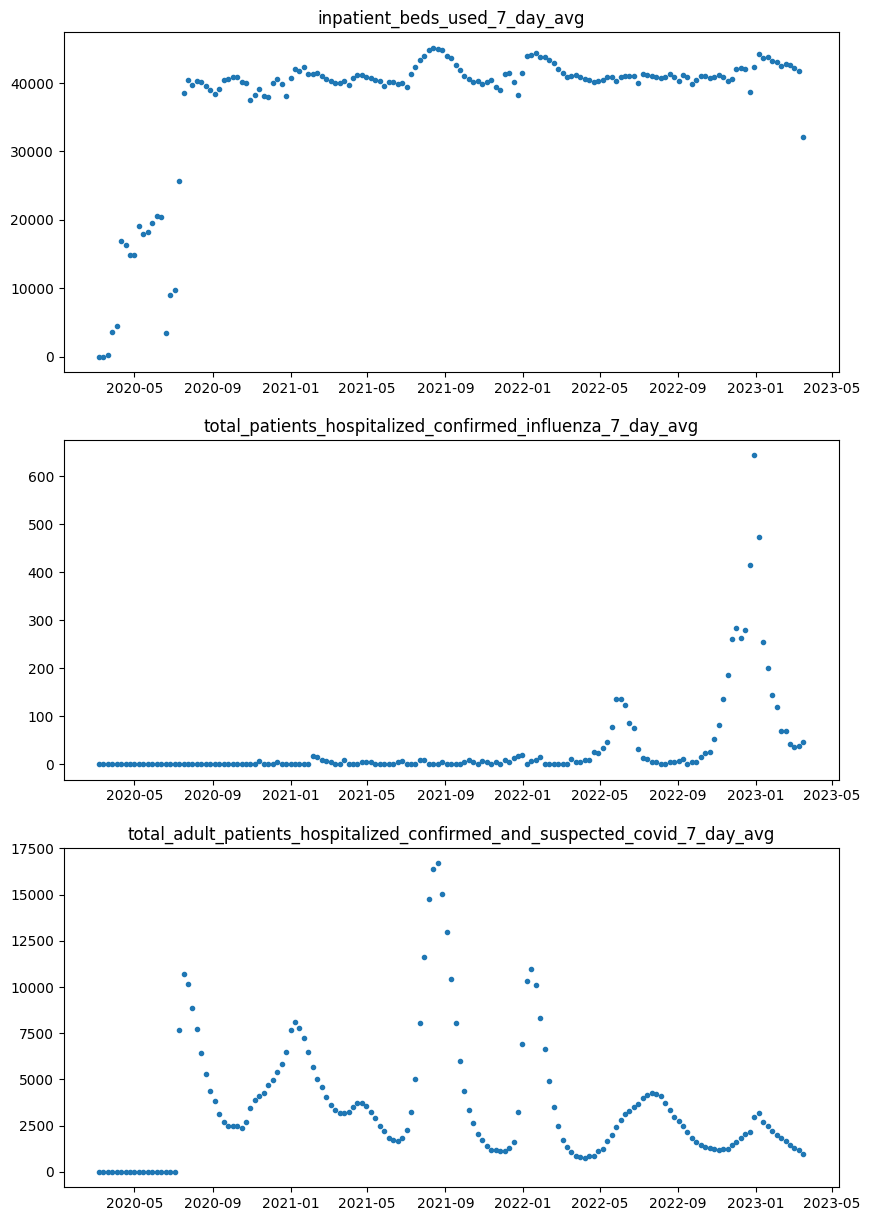

In [120]:
figure, axis = plt.subplots(3, 1, figsize=(10, 15))

axis[0].scatter(FL_hospital_data.index, FL_hospital_data['inpatient_beds_used_7_day_avg'], marker='.')
axis[0].set_title('inpatient_beds_used_7_day_avg')

axis[1].scatter(FL_hospital_data.index, FL_hospital_data['total_patients_hospitalized_confirmed_influenza_7_day_avg'], marker='.')
axis[1].set_title('total_patients_hospitalized_confirmed_influenza_7_day_avg')

axis[2].scatter(FL_hospital_data.index, FL_hospital_data['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg'], marker='.')
axis[2].set_title('total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg')


Hypotheses from stage 3:
- (inpatient_beds_used_7_day_avg)
    - The number of inpatient beds used on average weekly follow the trends of the number of covid deaths.
        - explanation: inpatient beds would be occupied by more severe cases of covid which means that the chance of the person dying from covid would be higher and would refelct the death rate of covid more closely.
- (total_patients_hospitalized_confirmed_influenza_7_day_avg)
    - The number of confirmed hospitalized influenza patients follows the trends of number of confirmed covid cases.
        - explanation: people that are hospitalized to something like the flu are also more likely to be hospitalized by covid. If more people are getting the flu then more people should be getting covid. 
- (total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg)
    - The trend of confirmed and suspected cases of covid should be very similar to only confirmed cases.
        - explanation: as peoples' understanding of covid becomes more advanced, hospitals should be able to make more accurate predictions of who has or doesn't have covid. If the trends are not similar then that means people are still not good at predicting covid.

In [121]:
print(FL_hospital_data.head(1).index)
print(FL_hospital_data.tail(11).index)
print(FL_hospital_data.shape)


DatetimeIndex(['2020-03-06'], dtype='datetime64[ns]', name='collection_week', freq=None)
DatetimeIndex(['2023-01-06', '2023-01-13', '2023-01-20', '2023-01-27',
               '2023-02-03', '2023-02-10', '2023-02-17', '2023-02-24',
               '2023-03-03', '2023-03-10', '2023-03-17'],
              dtype='datetime64[ns]', name='collection_week', freq=None)
(159, 3)


In [122]:
# covid starts from 2020-01-22 and ends at 2023-01-16
# the overlapping time frame is 2020-03-06 to 2023-01-06 for weekly averages. (This means I need to get weekly averages for 149 weeks)

FL_hypo_cases = FL_state_new_cases[41:]
FL_hypo_deaths = FL_state_new_deaths[41:]

FL_hypo_cases_weekly_avg = []
FL_hypo_deaths_weekly_avg = []
week_data = []
for i in FL_hypo_cases:
    week_data.append(i)
    if len(week_data) >= 7:
        FL_hypo_cases_weekly_avg.append(sum(week_data) / len(week_data))
        week_data = []

week_data = []
for i in FL_hypo_deaths:
    week_data.append(i)
    if len(week_data) >= 7:
        FL_hypo_deaths_weekly_avg.append(sum(week_data) / len(week_data))
        week_data = []


In [123]:
from scipy.stats import pearsonr

FL_hospital_hypo_data = FL_hospital_data.head(-10)
FL_hospital_hypo_data = FL_hospital_hypo_data.assign(FL_cases_weekly_avg = FL_hypo_cases_weekly_avg)
FL_hospital_hypo_data = FL_hospital_hypo_data.assign(FL_deaths_weekly_avg = FL_hypo_deaths_weekly_avg)
FL_hospital_hypo_data

,inpatient_beds_used_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,FL_cases_weekly_avg,FL_deaths_weekly_avg
collection_week,,,,,
2020-03-06,10.0,0.0,0.0,4418.857143,46.571429
2020-03-13,10.3,0.0,0.0,0.000000,0.000000
2020-03-20,239.1,0.0,0.0,3355.142857,47.714286
2020-03-27,3624.6,0.0,0.0,0.000000,0.000000
2020-04-03,4514.4,0.0,0.0,-1030.428571,90.571429
...,...,...,...,...,...
2022-12-09,42236.3,263.2,1823.8,0.142857,0.000000
2022-12-16,42046.1,278.8,2026.1,0.000000,0.000000
2022-12-23,38733.1,415.4,2172.1,0.000000,0.000000


In [124]:
correlation, p_value = pearsonr(FL_hospital_hypo_data['inpatient_beds_used_7_day_avg'], FL_hospital_hypo_data['FL_deaths_weekly_avg'])

print('Null Hypothesis 1: There is no relationship between number of inpatient beds used on average weekly and number of covid deaths.')
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis: there is a significant correlation between the number of inpatient beds used and COVID deaths.")
else:
    print("We fail to reject the null hypothesis: there is no significant correlation between the number of inpatient beds used and COVID deaths.")

Null Hypothesis 1: There is no relationship between number of inpatient beds used on average weekly and number of covid deaths.
Pearson correlation coefficient: 0.18
P-value: 0.02936
We reject the null hypothesis: there is a significant correlation between the number of inpatient beds used and COVID deaths.


In [125]:
correlation, p_value = pearsonr(FL_hospital_hypo_data['total_patients_hospitalized_confirmed_influenza_7_day_avg'], FL_hospital_hypo_data['FL_cases_weekly_avg'])

print('Null Hypothesis 2: There is no relationship between number of confirmed hospitalized influenza patients and number of covid cases.')
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis: there is a significant correlation between the number of confirmed hospitalized influenza patients and COVID cases.")
else:
    print("We fail to reject the null hypothesis: there is no significant correlation between the number of confirmed hospitalized influenza patients and COVID cases.")

Null Hypothesis 2: There is no relationship between number of confirmed hospitalized influenza patients and number of covid cases.
Pearson correlation coefficient: -0.19
P-value: 0.01836
We reject the null hypothesis: there is a significant correlation between the number of confirmed hospitalized influenza patients and COVID cases.


In [126]:
correlation, p_value = pearsonr(FL_hospital_hypo_data['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg'], FL_hospital_hypo_data['FL_cases_weekly_avg'])

print('Null Hypothesis 3: There is no relationship between number of confirmed and suspected cases of covid and number of covid cases.')
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis: there is a significant correlation between the number of confirmed and suspected cases of covid and COVID cases.")
else:
    print("We fail to reject the null hypothesis: there is no significant correlation between the number of confirmed and suspected cases of covid and COVID cases.")

Null Hypothesis 3: There is no relationship between number of confirmed and suspected cases of covid and number of covid cases.
Pearson correlation coefficient: 0.21
P-value: 0.01120
We reject the null hypothesis: there is a significant correlation between the number of confirmed and suspected cases of covid and COVID cases.


All the null hypotheses were rejected which means the data that I analyzed supports the idea that there is a relationships between the covid cases/deaths data and the enrichment data.

I will not be doing the chi-square test on this data because the chi-square test is good for testing the relationship between two categorical variables. The datasets that I am working working with are contiuous variables which means the chi-sqaure test would not be appropriate to use.